In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celmech.disturbing_function import df_coefficient_Ctilde
from celmech.disturbing_function import evaluate_df_coefficient_dict
from celmech.disturbing_function import laplace_b as b

In [2]:
def b1(alpha):
    return b(1.5, 1, 0, alpha)
def b2(alpha):
    return b(1.5, 2, 0, alpha)

In [3]:
def Mprime(alpha, mass):
    m1, m2, m3 = mass
    m_tot = m1+m2+m3
    alpha12, alpha23, alpha13 = alpha
    
    R = np.array([[np.sqrt(m1/m_tot), np.sqrt(m2/m_tot), np.sqrt(m3/m_tot)],
             [-np.sqrt(m3/(m1+m3)), 0, np.sqrt(m1/(m1+m3))],
             [np.sqrt(m1*m2/(m1+m3)/m_tot), -np.sqrt((m1+m3)/m_tot), np.sqrt(m2*m3/(m1+m3)/m_tot)]])
       
    M = np.array([[b1(alpha12)*m2+b1(alpha13)*m3, -b2(alpha12)*np.sqrt(m1*m2), -b2(alpha13)*np.sqrt(m1*m3)],
             [-b2(alpha12)*np.sqrt(m1*m2), b1(alpha12)*m1+ b1(alpha23)*m3, -b2(alpha23)*np.sqrt(m2*m3)],
             [-b2(alpha13)*np.sqrt(m1*m3), -b2(alpha23)*np.sqrt(m2*m3), b1(alpha13)*m1+b1(alpha23)*m2]])*(-2*alpha[2])*np.pi/4
    
    return np.matmul(np.matmul(R, M), np.transpose(R))

In [4]:
Mprime((0.9069999724351591, 0.9070000141953458, 0.8226489878738675),(1e-8,1e-10,1e-8))

array([[-2.38932609e-08, -2.27042225e-17,  2.52071285e-09],
       [-2.27042836e-17, -5.39488788e-07, -6.15713245e-14],
       [ 2.52071285e-09, -6.15713245e-14, -1.98134549e-06]])

$$ R \cdot \begin{pmatrix}\vec{G_1}\\ \vec{G_2}\\ \vec{G_3} \end{pmatrix} = \begin{pmatrix}\vec{S_1}\\ \vec{S_2}\\ \vec{S_3} \end{pmatrix} $$

In [187]:
def StoG(mass, amp, phi):
    m1, m2, m3 = mass
    m_tot = m1+m2+m3
    A1, A2, A3 = amp
    p1, p2, p3 = phi
    
    e1_x = 1/np.sqrt(m1)*(np.sqrt(m1/m_tot)*A1*np.cos(p1) - np.sqrt(m3/(m1+m3))*A2*np.cos(p2) + np.sqrt(m1*m2/(m_tot*(m1+m3)))*A3*np.cos(p3))
    e2_x = 1/np.sqrt(m2)*(np.sqrt(m2/m_tot)*A1*np.cos(p1) - np.sqrt((m1+m3)/m_tot)*A3*np.cos(p3))
    e3_x = 1/np.sqrt(m3)*(np.sqrt(m3/m_tot)*A1*np.cos(p1) + np.sqrt(m1/(m1+m3))*A2*np.cos(p2) + np.sqrt(m2*m3/(m_tot*(m1+m3)))*A3*np.cos(p3))
    
    e1_y = 1/np.sqrt(m1)*(np.sqrt(m1/m_tot)*A1*np.sin(p1) - np.sqrt(m3/(m1+m3))*A2*np.sin(p2) + np.sqrt(m1*m2/(m_tot*(m1+m3)))*A3*np.sin(p3))
    e2_y = 1/np.sqrt(m2)*(np.sqrt(m2/m_tot)*A1*np.sin(p1) - np.sqrt((m1+m3)/m_tot)*A3*np.sin(p3))
    e3_y = 1/np.sqrt(m3)*(np.sqrt(m3/m_tot)*A1*np.sin(p1) + np.sqrt(m1/(m1+m3))*A2*np.sin(p2) + np.sqrt(m2*m3/(m_tot*(m1+m3)))*A3*np.sin(p3))
    
    e1, e2, e3 = np.sqrt(e1_x**2 + e1_y**2), np.sqrt(e2_x**2 + e2_y**2), np.sqrt(e3_x**2 + e3_y**2)
    pom1, pom2, pom3 = np.arctan2(e1_y,e1_x), np.arctan2(e2_y,e2_x), np.arctan2(e3_y,e3_x)
    
    return (e1, e2, e3), (pom1, pom2, pom3)

In [188]:
def GtoS(alpha, mass, ecc, pomega):
    alpha12, alpha23, alpha13 = alpha
    m1, m2, m3 = mass
    m_tot = m1+m2+m3
    ecc1, ecc2, ecc3 = ecc
    pom1, pom2, pom3 = pomega

    e1_x, e2_x, e3_x = ecc1*np.cos(pom1), ecc2*np.cos(pom2), ecc3*np.cos(pom3)
    e1_y, e2_y, e3_y = ecc1*np.sin(pom1), ecc2*np.sin(pom2), ecc3*np.sin(pom3)
    
    amp1 = np.sqrt(1/m_tot) * np.sqrt((m1*e1_y + m2*e2_y + m3*e3_y)**2 + (m1*e1_x + m2*e2_x + m3*e3_x)**2)
    amp2 = np.sqrt(m1*m3/(m1+m3)) * np.sqrt((e3_y-e1_y)**2 + (e3_x-e1_x)**2)
    amp3 = np.sqrt(m2/((m1+m3)*m_tot)) * np.sqrt((m3*(e3_y-e2_y)-m1*(e2_y-e1_y))**2+(m3*(e3_x-e2_x)-m1*(e2_x-e1_x))**2)
    
    phase1 = np.arctan2(m1*e1_y+m2*e2_y+m3*e3_y, m1*e1_x+m2*e2_x+m3*e3_x)
    phase2 = np.arctan2(e3_y-e1_y, e3_x-e1_x)
    phase3 = np.arctan2(m3*(e3_y-e2_y)-m1*(e2_y-e1_y), m3*(e3_x-e2_x)-m1*(e2_x-e1_x))
    
    omega2 = 1/(m1+m3)*(m2*m3*b1(alpha12) + m1*m2*b1(alpha23) + (m1**2+m3**2)*b1(alpha13) + 2*m1*m3*b2(alpha13)) * (2*alpha13)*np.pi/4
    omega3 = (((m1+m3)**2+m2**2)/((m1+m3)*m_tot)*(m1*b1(alpha12) + m3*b1(alpha23)) + 2*m2/m_tot*(m1*b2(alpha12)+m3*b2(alpha23))) * (2*alpha13)*np.pi/4
    
    return amp1, amp2, amp3, phase1, phase2, phase3, omega2, omega3

In [189]:
def breathingON(mass, A3):
    m1, m2, m3 = mass
    m_tot = m1+m2+m3
    
    A2 = (np.sqrt((m1+m3)/(m2*m_tot)) + np.sqrt(m2/((m1+m3)*m_tot)))*A3 / np.sqrt(m3/(m1*(m1+m3)))
    return A2

In [190]:
def plotEcc(alpha, mass, ecc, pomega, time):
    m1, m2, m3 = mass
    m_tot = m1+m2+m3
    A1, A2, A3, p1, p2, p3, w2, w3 = GtoS(alpha, mass, ecc, pomega)
    print(f"A1={A1},A2={A2},A3={A3}")
    print(f"w2={w2},w3={w3}")
    
    t = np.linspace(0,time,400)
    
    e1_x = 1/np.sqrt(m1)*(np.sqrt(m1/m_tot)*A1*np.cos(p1) - np.sqrt(m3/(m1+m3))*A2*np.cos(w2*t+p2) + np.sqrt(m1*m2/(m_tot*(m1+m3)))*A3*np.cos(w3*t+p3))
    e2_x = 1/np.sqrt(m2)*(np.sqrt(m2/m_tot)*A1*np.cos(p1) - np.sqrt((m1+m3)/m_tot)*A3*np.cos(w3*t+p3))
    e3_x = 1/np.sqrt(m3)*(np.sqrt(m3/m_tot)*A1*np.cos(p1) + np.sqrt(m1/(m1+m3))*A2*np.cos(w2*t+p2) + np.sqrt(m2*m3/(m_tot*(m1+m3)))*A3*np.cos(w3*t+p3))
    
    e1_y = 1/np.sqrt(m1)*(np.sqrt(m1/m_tot)*A1*np.sin(p1) - np.sqrt(m3/(m1+m3))*A2*np.sin(w2*t+p2) + np.sqrt(m1*m2/(m_tot*(m1+m3)))*A3*np.sin(w3*t+p3))
    e2_y = 1/np.sqrt(m2)*(np.sqrt(m2/m_tot)*A1*np.sin(p1) - np.sqrt((m1+m3)/m_tot)*A3*np.sin(w3*t+p3))
    e3_y = 1/np.sqrt(m3)*(np.sqrt(m3/m_tot)*A1*np.sin(p1) + np.sqrt(m1/(m1+m3))*A2*np.sin(w2*t+p2) + np.sqrt(m2*m3/(m_tot*(m1+m3)))*A3*np.sin(w3*t+p3))
    
    e1 = np.sqrt(e1_x**2 + e1_y**2)
    e2 = np.sqrt(e2_x**2 + e2_y**2)
    e3 = np.sqrt(e3_x**2 + e3_y**2)
    
    e21 = np.sqrt((e2_x-e1_x)**2 + (e2_y-e1_y)**2)
    e32 = np.sqrt((e3_x-e2_x)**2 + (e3_y-e2_y)**2)
    
#     pom1 = np.arctan2(e1_y, e1_x)
#     pom2 = np.arctan2(e2_y, e2_x)
#     pom3 = np.arctan2(e3_y, e3_x)
    
    fig, axarr = plt.subplots(nrows=5, figsize=(12,14))
    axarr[0].plot(t, e1, 'k.')
    axarr[0].set_ylabel(r"$e_{1}$")
    
    axarr[1].plot(t, e2, 'k.')
    axarr[1].set_ylabel(r"$e_{2}$")
    
    axarr[2].plot(t, e3, 'k.')
    axarr[2].set_ylabel(r"$e_{3}$")
    
    axarr[3].plot(t, e21, 'k.')
    axarr[3].set_ylabel(r"$e_{21}$")
    
    axarr[4].plot(t, e32, 'k.')
    axarr[4].set_ylabel(r"$e_{32}$")
    
#     axarr[5].plot(t, pom1, 'k.')
#     axarr[5].set_ylabel(r"$\varpi_{1}$")
    
#     axarr[6].plot(t, pom2, 'k.')
#     axarr[6].set_ylabel(r"$\varpi_{2}$")
    
#     axarr[7].plot(t, pom3, 'k.')
#     axarr[7].set_ylabel(r"$\varpi_{3}$")

(0.010000000000000002, 0.01, 0.029999999999999995) (3.141592653589793, 3.141592653589793, 0.0)
A1=5.773502691896253e-07,A2=2.82842712474619e-06,A3=1.6329931618554518e-06
w2=1.5156098016394417e-06,w3=2.91824810957396e-06


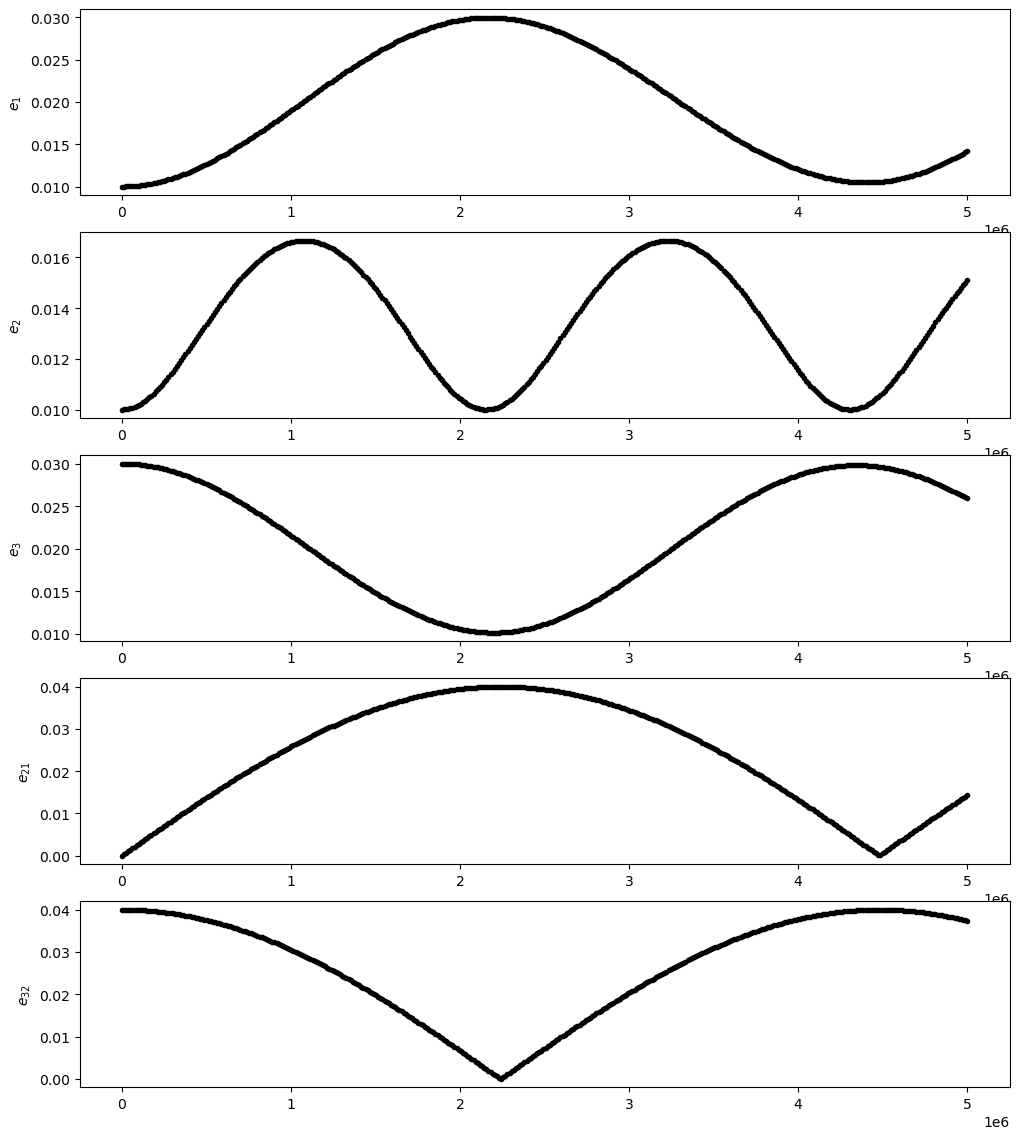

In [192]:
alpha = 0.9069999726563372, 0.907000014295593, 0.8226489881654002
mass = 1e-8,1e-8,1e-8

# ecc = 0.01, 0.01, 0.01
# pomega = 0, np.pi, 0
# amp1, amp2, amp3, phase1, phase2, phase3, omega2, omega3 = GtoS(alpha, mass, ecc, pomega)
# print(amp1, amp2, amp3, phase1, phase2, phase3)

ecc, pomega = StoG(mass, (amp1, breathingON(mass,amp3), amp3), (phase1, phase2, phase3))
print(ecc, pomega)
plotEcc(alpha, mass, ecc, pomega,5e6)

(0.01, 0.01, 0.01) (0.0, 3.141592653589793, 0.0)
A1=5.773502691896258e-07,A2=0.0,A3=1.632993161855452e-06
w2=1.5156098016394417e-06,w3=2.91824810957396e-06


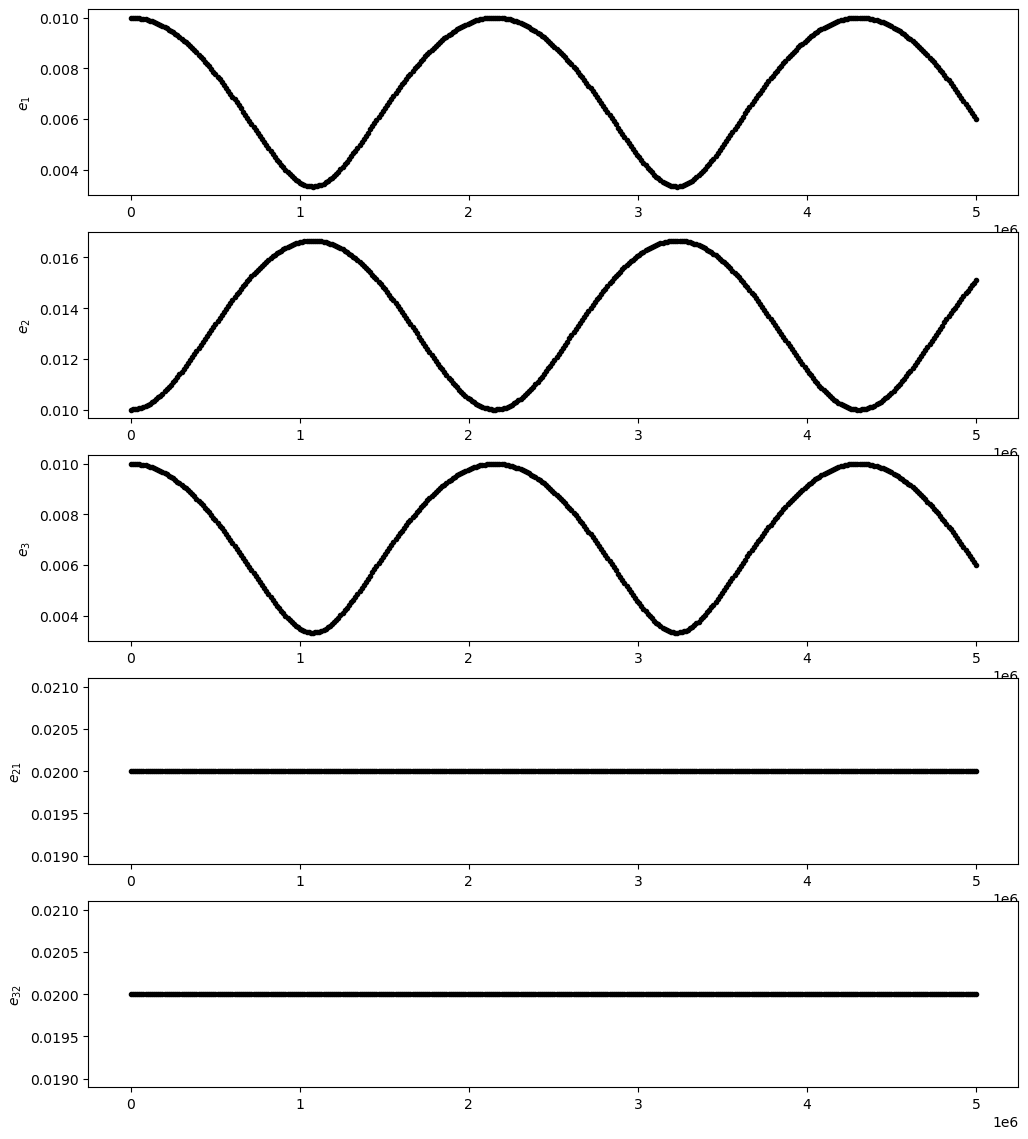

In [193]:
ecc, pomega = StoG(mass, (amp1, 0, amp3), (phase1, phase2, phase3))
print(ecc, pomega)
plotEcc(alpha, mass, ecc, pomega,5e6)